# Bucket-wise Failure Cases

In this notebook, we visualize which buckets for each reasoning showed the most failure cases across all methods.

In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

import sys
sys.path.append('../')
import smerf
from smerf.models import *
from smerf.textbox_data import *
from smerf.eval import *
import smerf.explanations as saliency
import pickle
import os
from mpl_toolkits.axes_grid1 import make_axes_locatable
import glob

CACHE_DIR = '../outputs/cache'
if not os.path.exists(CACHE_DIR):
    os.mkdir(CACHE_DIR)
    
PLOT_DIR = '../outputs/plots'
if not os.path.exists(PLOT_DIR):
    os.mkdir(PLOT_DIR)
    
exp_no = 2
methods_name =  os.path.join(CACHE_DIR, 'methods_%0.2f.pkl'%exp_no)
methods = pickle.load(open(methods_name, 'rb'))
methods = [m[3] for m in methods][1:]

Using TensorFlow backend.


Bucket[11] : 13 / 15 methods with minium PAFL
Gradient
SmoothGrad
Guided Backprop
DeepTaylor
Input * Gradient
Integrated Gradients
LRP-Z
LRP-Epsilon
LRP-PresetAFlat
DeepLIFT-RevealCancel
DeepLIFT-Rescale
Grad-CAM
DeepSHAP
Bucket[8] : 1 / 15 methods with minium PAFL
Deconvnet
Bucket[7] : 1 / 15 methods with minium PAFL
LRP-PresetBFlat


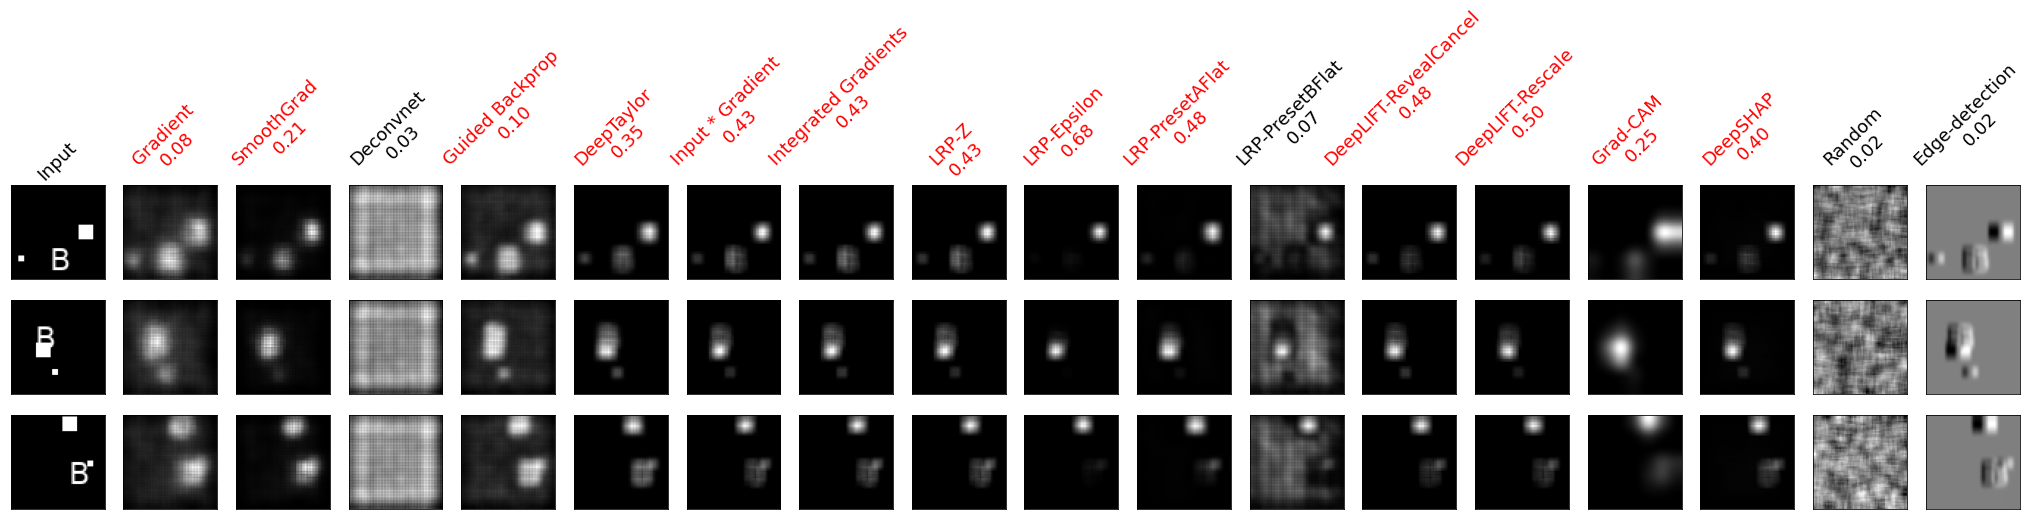

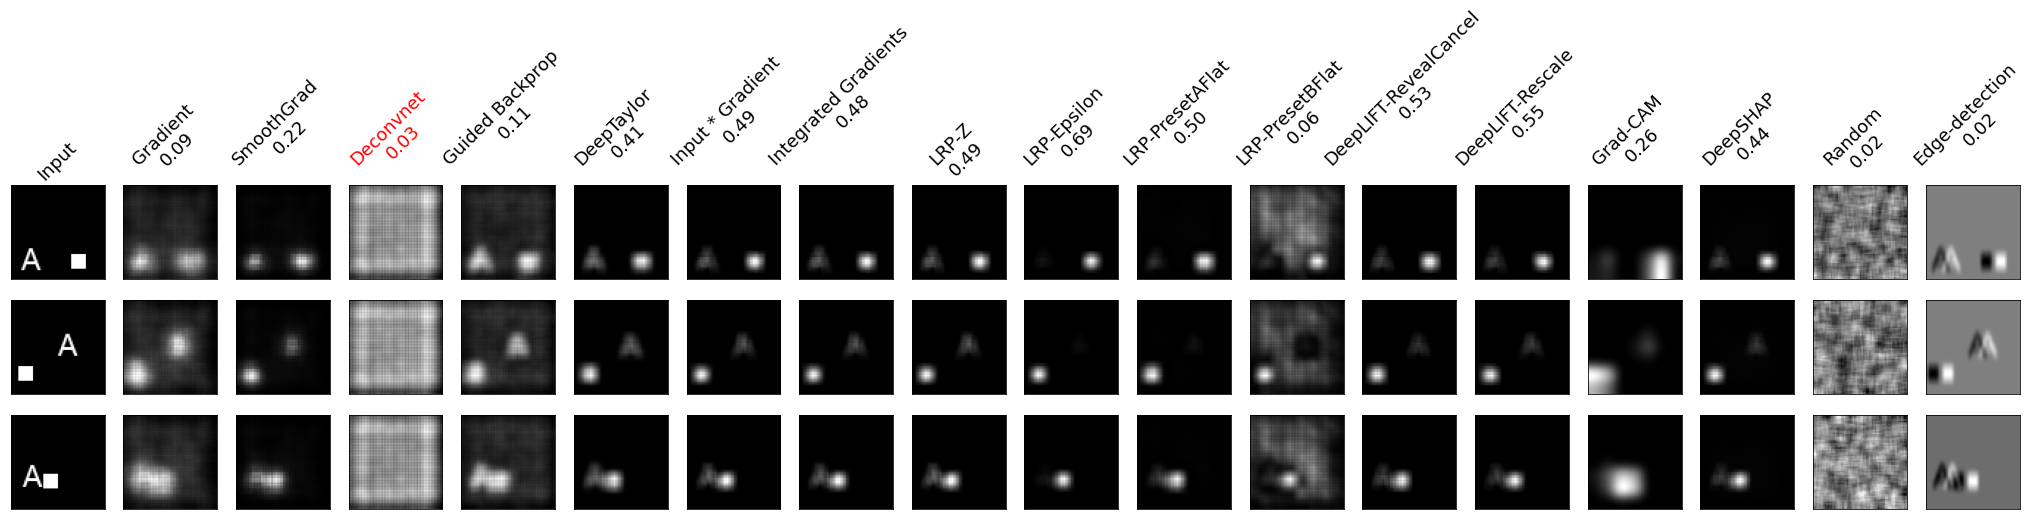

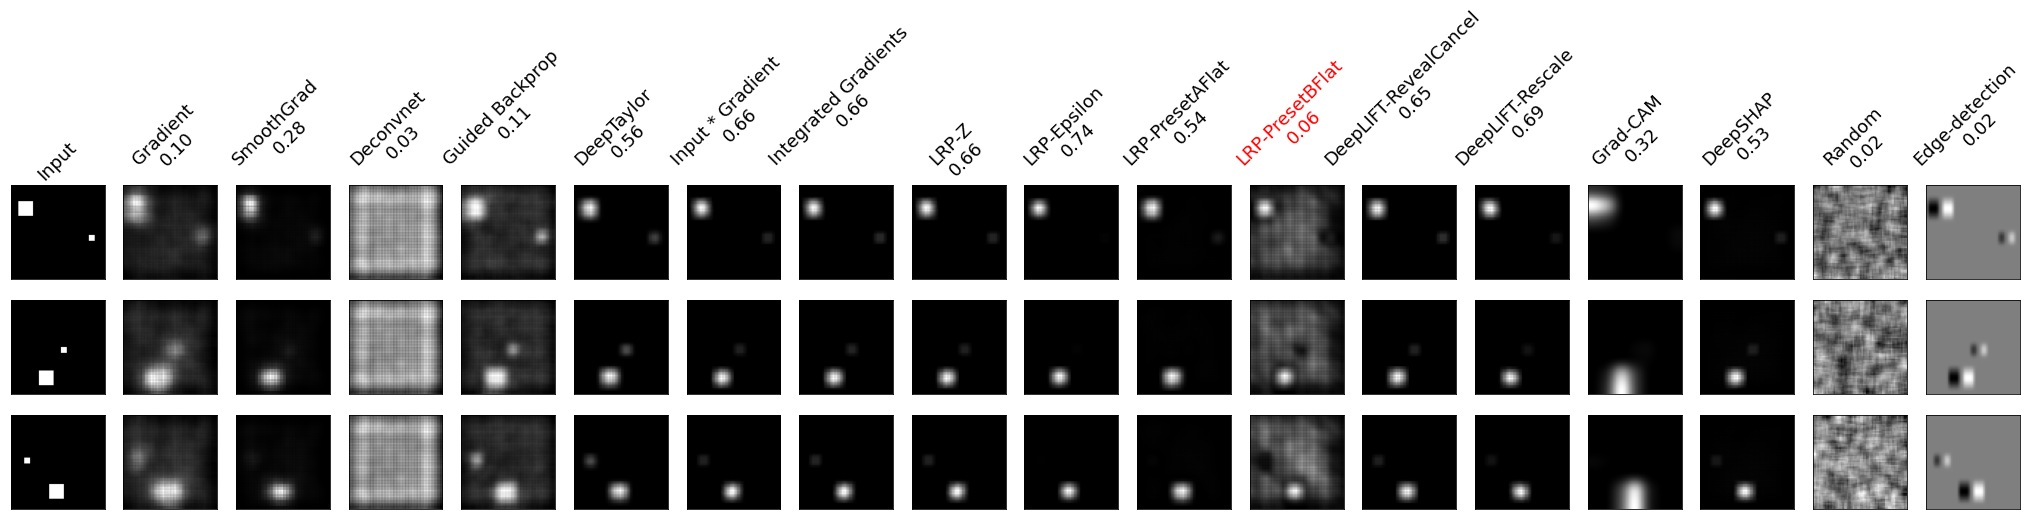

In [2]:
def load_saliency_results(exp_no):
    result_name = os.path.join(CACHE_DIR, 'result_%0.2f.pkl'%exp_no)
    methods_name = os.path.join(CACHE_DIR, 'methods_%0.2f.pkl'%exp_no)
    data = pickle.load(open(result_name, 'rb'))
    methods = pickle.load(open(methods_name, 'rb'))
    return data, methods

def compute_valid_minmaxavg(arr):
    # ignore invalid ones and compute avg and std
    no_images, no_methods, no_values = arr.shape
    out = []
    for i in range(no_values):
        tt = arr[:,:,i]
        tt = tt[~(tt == -1).any(axis=1)]
        out.append((np.mean(tt, axis=0), np.std(tt, axis=0), np.min(tt,axis=0), np.max(tt,axis=0)))
    return out

def plot_min_buckets(exp_no, metric_type, save=False, plot_dir=PLOT_DIR, preprocess=True):
    case_nos = [exp_no]
    p_results = []
    s_results = []
    for s in case_nos:
        bucket_results = sorted(glob.glob("../outputs/cache/metrics_%s_%0.2f_*.npy"%(metric_type, s)))
        ids = sorted([int(x.split('_')[-1][:-4]) for x in bucket_results])
        for i in ids:
            d = np.load("../outputs/cache/metrics_%s_%0.2f_%d.npy"%(metric_type, s,i))
            bucket_p, bucket_s = d[0], d[2]
            p_results.append(bucket_p)
            s_results.append(bucket_s)
    p_results = np.array(p_results)
    s_results = np.array(s_results)
    p_results = np.nan_to_num(p_results, nan=1000)
    min_bucket_ids = np.argmin(p_results[:,:-2], axis=0)
    (unique, counts) = np.unique(min_bucket_ids, return_counts=True)
    order = np.argsort(counts)[::-1]
    counts = counts[order]
    unique = unique[order]

    sals, methods_orig = load_saliency_results(exp_no)

    for b, c in zip(unique, counts):
        fail_no = c
        fail_bucket_id = b
        failed_method_idx = np.where(min_bucket_ids == fail_bucket_id)[0]
        min_vals = p_results[fail_bucket_id]
        print("Bucket[%d] : %d / 15 methods with minium PAFL"%(b, fail_no)) # number of failure cases
        for m in failed_method_idx:
            print("%s"%(methods_orig[m+1][-1]))
        no_sample = 3
        fails = sals[20*fail_bucket_id: 20*(fail_bucket_id+1)]
        f, axs = plt.subplots(no_sample, fails.shape[1], figsize=(2*fails.shape[1], 2*no_sample))
        for i in range(no_sample):
            for j in range(fails.shape[1]):
                if j == 0:
                    pp = fails[i,j]
                else:
                    if preprocess:
                        if methods_orig[j][2] == textcolorutils.heatmap:
                            pp = 1 - np.mean(fails[i,j], axis=2)
                        else:
                            pp = np.max(fails[i,j], axis=2)
                        pp = cv2.blur(pp, (7,7)) # blur
                        pp = (pp - np.min(pp)) / (np.max(pp) - np.min(pp))
                    else:
                        pp = fails[i,j]
                axs[i,j].imshow(pp, plt.get_cmap('gray'))
                if i == 0:
                    if j != 0:
                        title = '%s\n%0.2f'%(methods_orig[j][-1], min_vals[j-1])
                        if j-1 in failed_method_idx:
                            color = 'r'
                        else:
                            color = 'k'
                    else:
                        title = methods_orig[j][-1]
                        color = 'k'
                    axs[i,j].set_title(title, rotation=45, fontsize=18, color=color)
                axs[i,j].set_xticks(())
                axs[i,j].set_yticks(())

# Plot buckets that contain most number of failed methods. 
exp_no = 1.11
metric_type = 'weighted'
plot_min_buckets(exp_no, metric_type)

Bucket[6] : 8 / 15 methods with minium performance
DeepTaylor
LRP-Epsilon
LRP-PresetAFlat
LRP-PresetBFlat
DeepLIFT-RevealCancel
DeepLIFT-Rescale
Grad-CAM
DeepSHAP
Bucket[3] : 6 / 15 methods with minium performance
Gradient
SmoothGrad
Deconvnet
Input * Gradient
Integrated Gradients
LRP-Z
Bucket[0] : 1 / 15 methods with minium performance
Guided Backprop


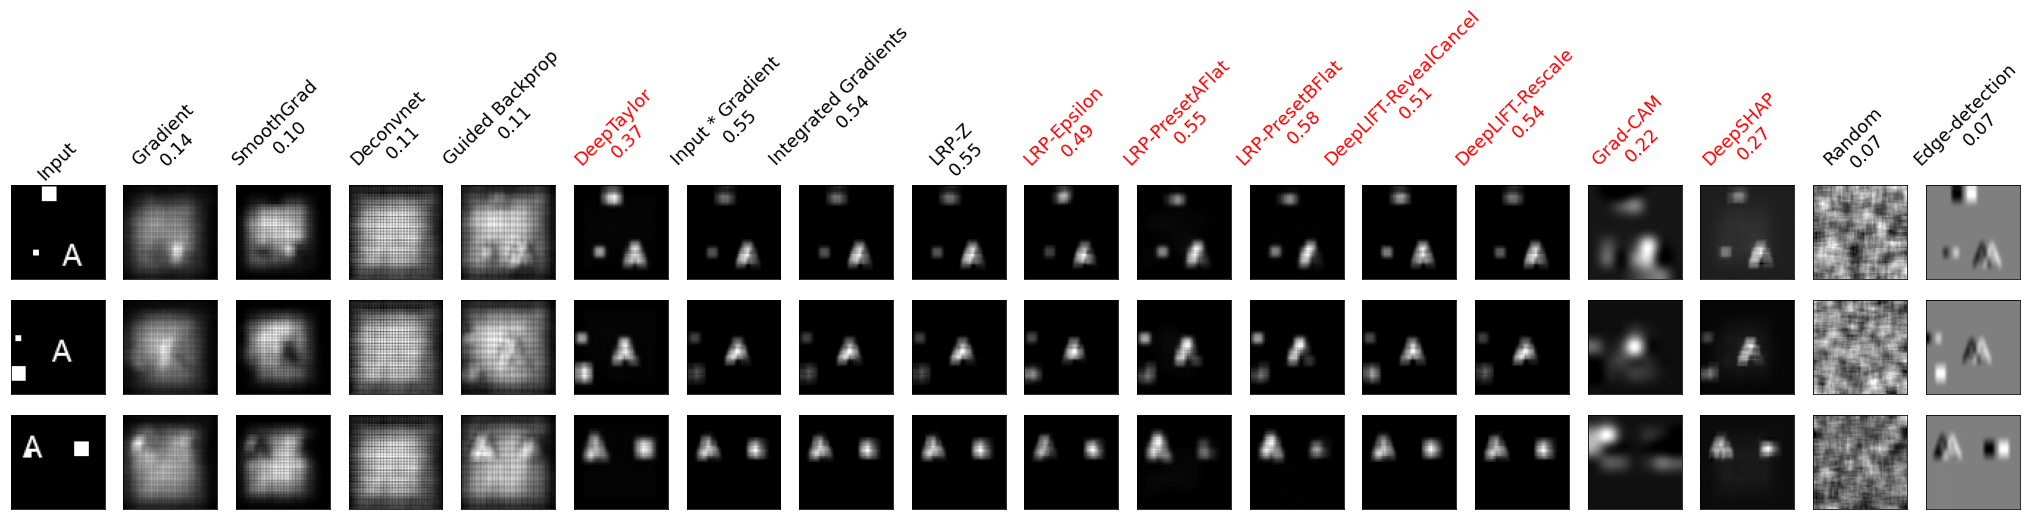

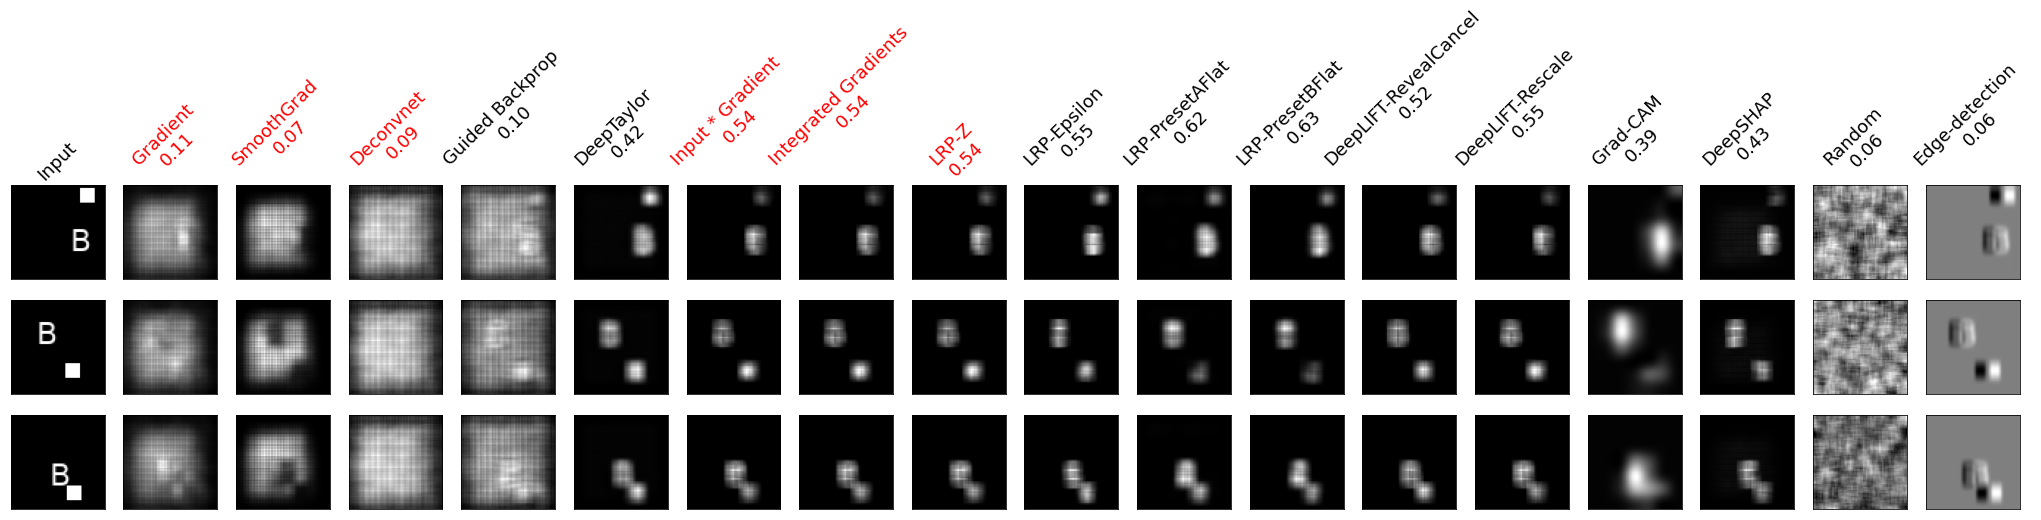

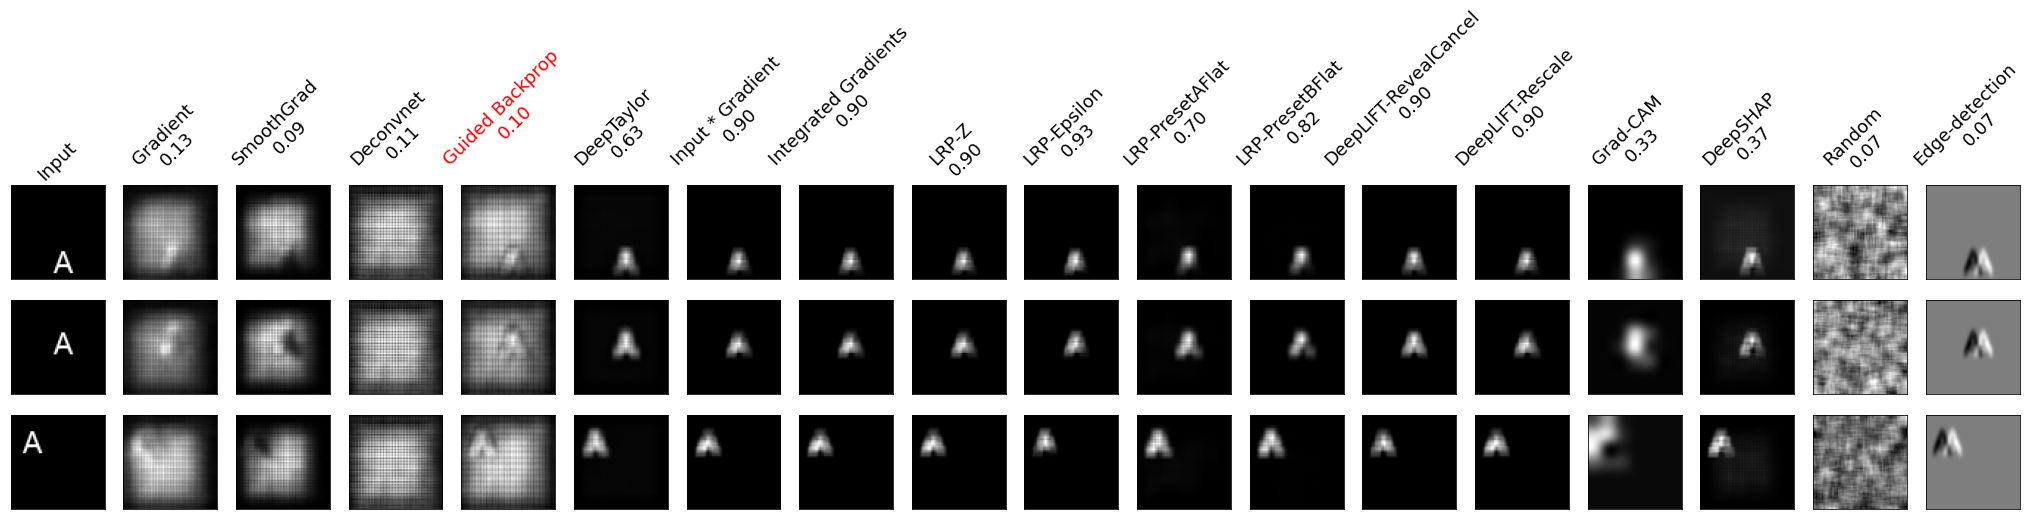

In [6]:
exp_no = 2.11
metric_type = 'weighted'
plot_min_buckets(exp_no, metric_type)

Bucket[4] : 13 / 15 methods with minium PAFL
Gradient
SmoothGrad
Guided Backprop
DeepTaylor
Input * Gradient
Integrated Gradients
LRP-Z
LRP-PresetAFlat
LRP-PresetBFlat
DeepLIFT-RevealCancel
DeepLIFT-Rescale
Grad-CAM
DeepSHAP
Bucket[9] : 1 / 15 methods with minium PAFL
Deconvnet
Bucket[5] : 1 / 15 methods with minium PAFL
LRP-Epsilon


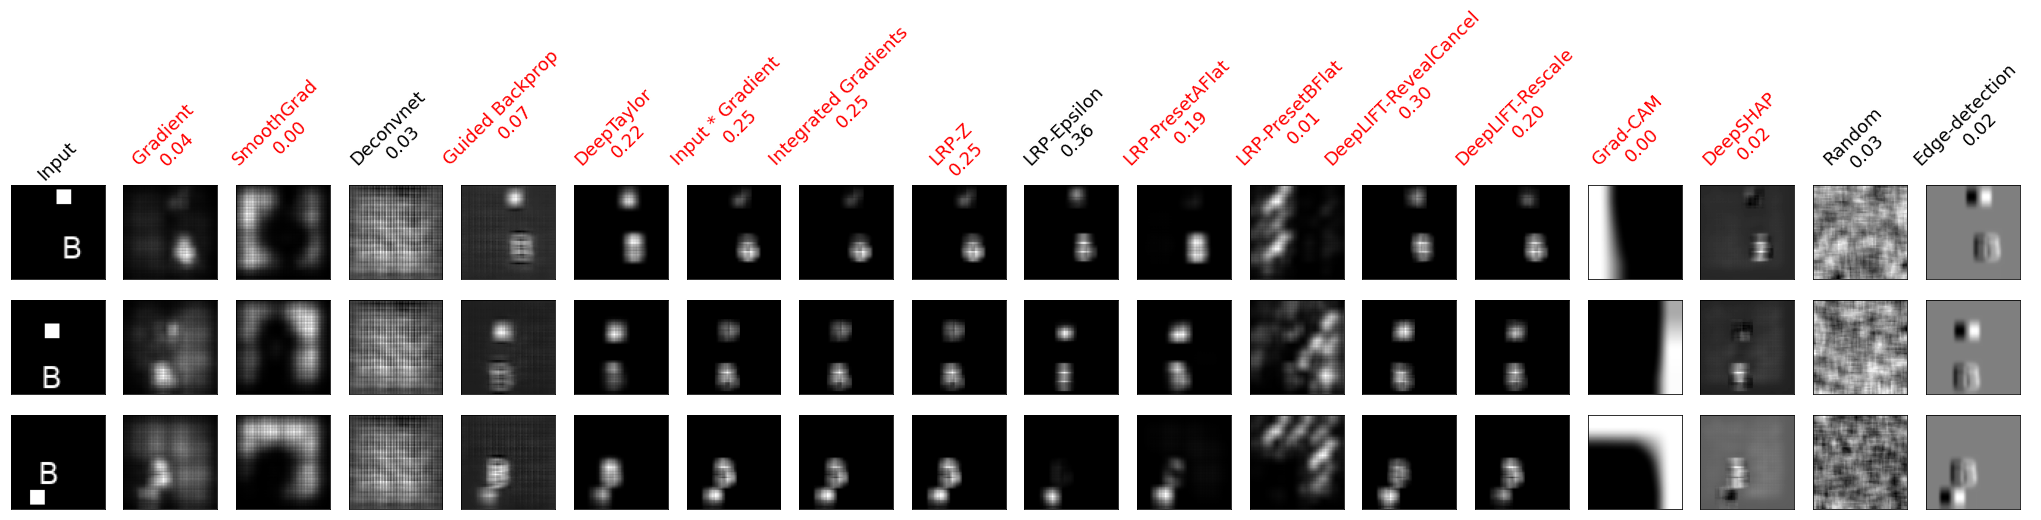

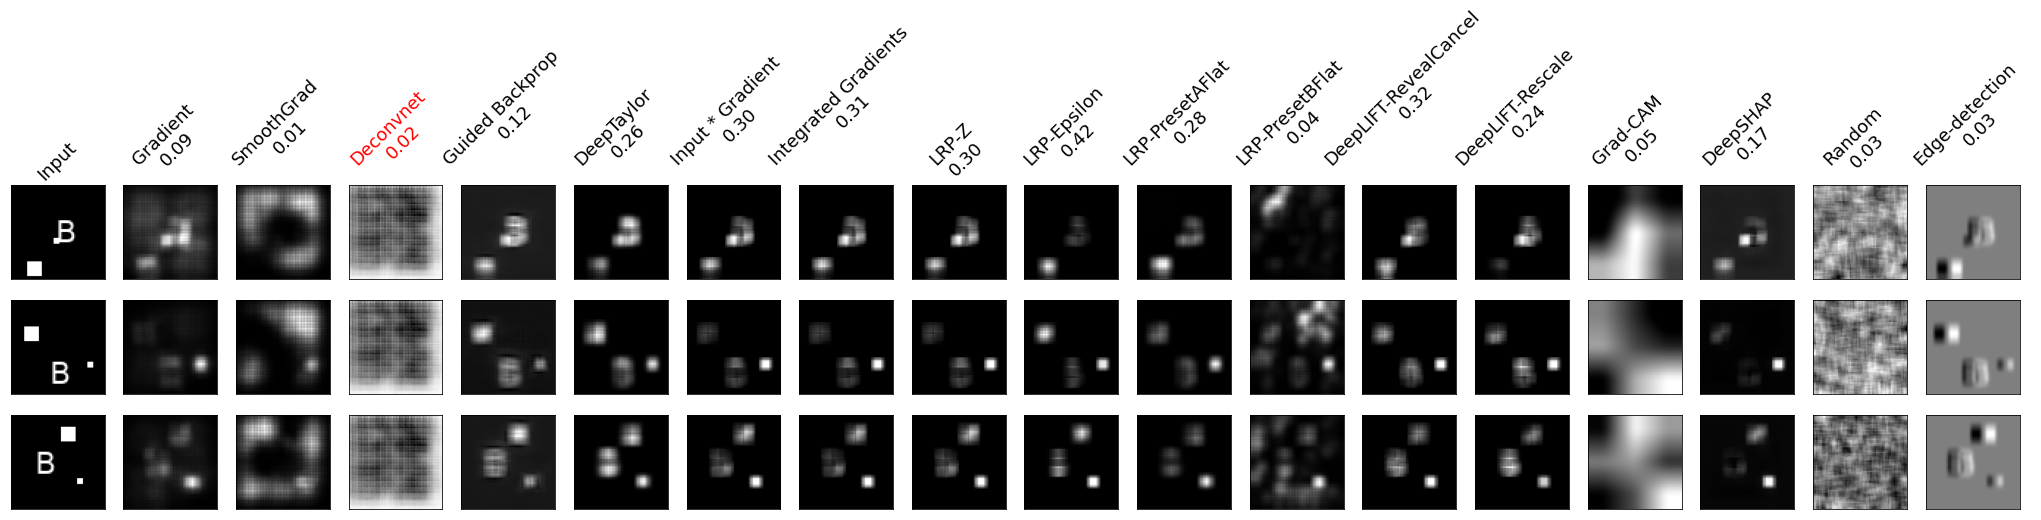

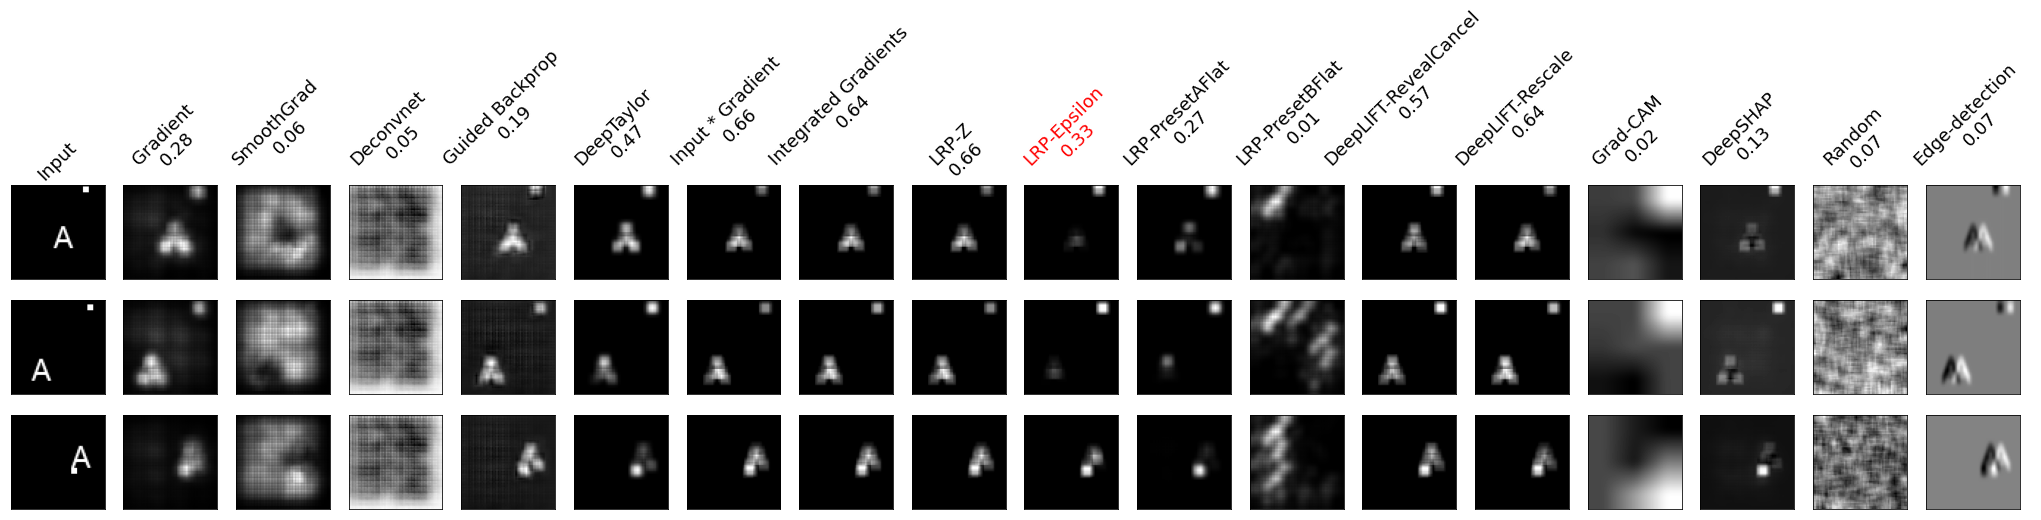

In [163]:
exp_no = 3.72
metric_type = 'weighted'
plot_min_buckets(exp_no, metric_type)

Bucket[11] : 10 / 15 methods with minium performance
Gradient
Deconvnet
DeepTaylor
Input * Gradient
Integrated Gradients
LRP-Z
LRP-Epsilon
LRP-PresetAFlat
DeepLIFT-RevealCancel
DeepLIFT-Rescale
Bucket[9] : 3 / 15 methods with minium performance
LRP-PresetBFlat
Grad-CAM
DeepSHAP
Bucket[7] : 2 / 15 methods with minium performance
SmoothGrad
Guided Backprop


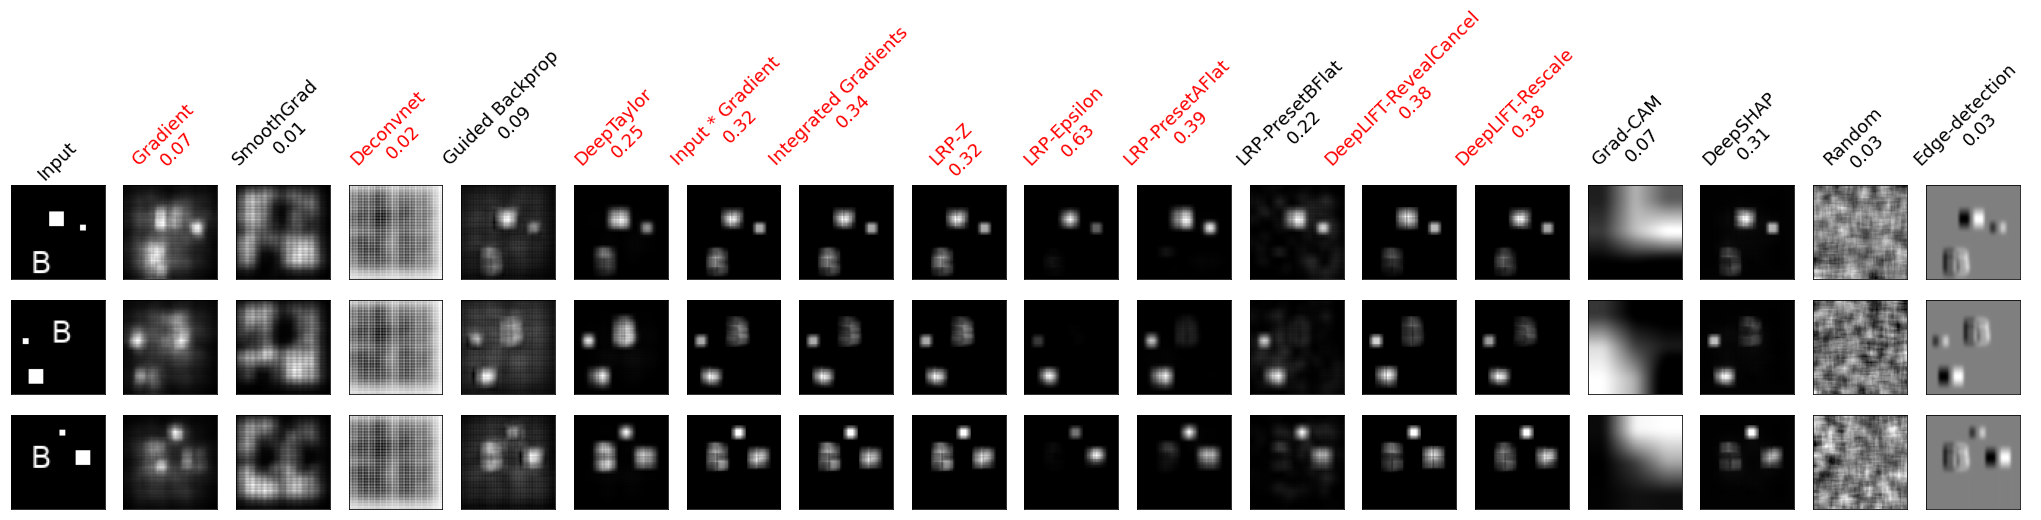

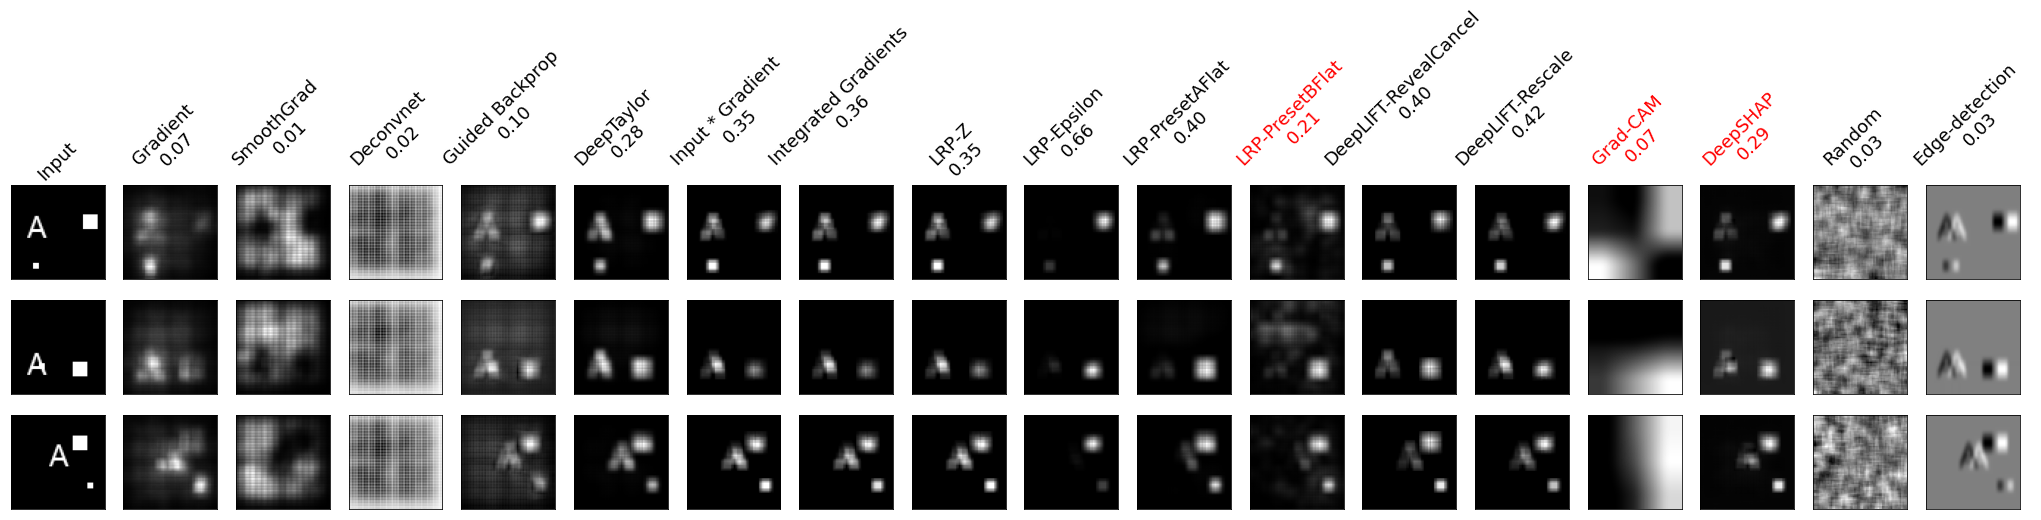

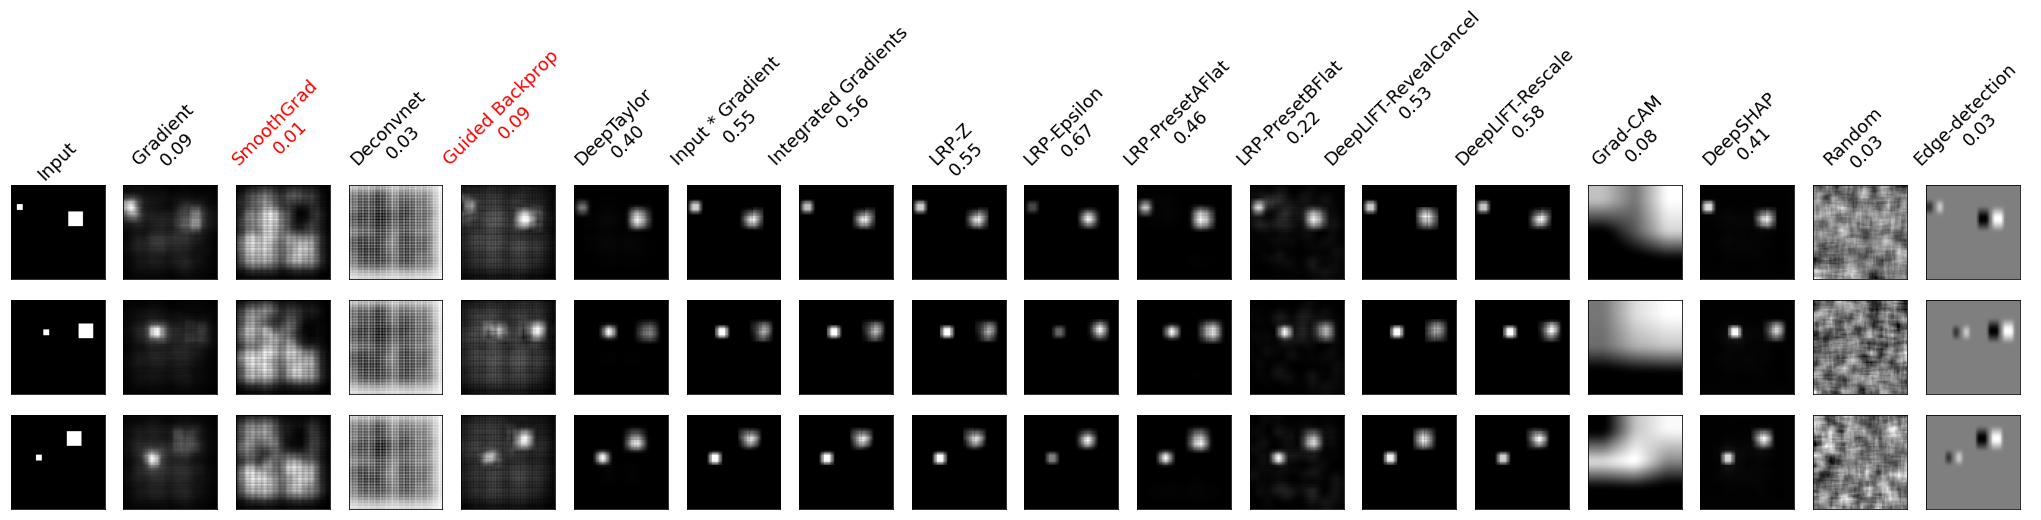

In [9]:
exp_no = 1.2
metric_type = 'weighted'
plot_min_buckets(exp_no, metric_type)

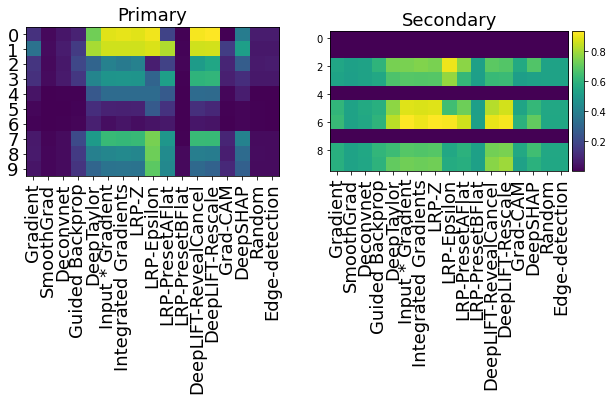

In [4]:
def plot_bucket_heatmap(exp_no, metric_type, methods, save=False, plot_dir=PLOT_DIR):
    case_nos = [exp_no]
    p_results = []
    s_results = []
    for s in case_nos:
        bucket_results = sorted(glob.glob("../outputs/cache/metrics_%s_%s_*.npy"%(metric_type, s)))
        ids = sorted([int(x.split('_')[-1][:-4]) for x in bucket_results])
        for i in ids:
            d = np.load("../outputs/cache/metrics_%s_%s_%d.npy"%(metric_type, s,i))
            bucket_p, bucket_s = d[0], d[2]
            p_results.append(bucket_p)
            s_results.append(bucket_s)
    p_results = np.array(p_results)
    s_results = np.array(s_results)
    p_results = np.nan_to_num(p_results, nan=-1)
    s_results = np.nan_to_num(s_results, nan=-1)
    
    f, axs = plt.subplots(1,2, figsize=(10,5))
    im = axs[0].imshow(p_results)    
    axs[0].set(xticks=range(len(methods)), xticklabels=methods)
    axs[0].set_xticklabels(methods, rotation=90, fontsize=18)
    bucket_ids = range(p_results.shape[0])
    axs[0].set(yticks=bucket_ids, yticklabels=bucket_ids)
    axs[0].set_yticklabels(bucket_ids, fontsize=18)
    axs[0].set_title('Primary', fontsize=18)   
    im2 = axs[1].imshow (s_results)
    axs[1].set(xticks=range(len(methods)), xticklabels=methods)
    axs[1].set_xticklabels(methods, rotation=90, fontsize=18)
    axs[1].set_title('Secondary', fontsize=18)
    divider = make_axes_locatable(axs[1])
    cax = divider.append_axes("right", size="5%", pad=0.05)
    plt.colorbar(im, cax=cax)
method_names = methods
plot_bucket_heatmap(3.71, 'weighted', method_names)

Text(0.5, 1.0, 'Fraction of Successful Buckets\nPAFL > 0.5')

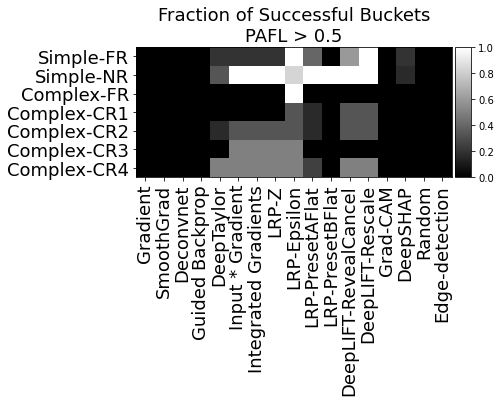

In [165]:
# Those that fail more than half the bucekt
exp_nos = [1.11, 2.11, 1.2, 3.71, 3.72, 3.73, 3.74]
exp_names = ['Simple-FR', 'Simple-NR', 'Complex-FR', 'Complex-CR1', 'Complex-CR2', 'Complex-CR3', 'Complex-CR4']
out = np.zeros((len(exp_nos), len(method_names), 2))
valid_bucket_ids = dict()
for i, exp_no in enumerate(exp_nos):
    valid_bucket_ids[exp_no] = dict()
    for m in range(len(method_names)):
        valid_bucket_ids[exp_no][m] = []
        #result, methods = load_saliency_results(exp_no)
        bucket_results = sorted(glob.glob("../outputs/cache/metrics_avg-weighted_%0.2f_*.npy"%(exp_no)))
        ids = sorted([int(x.split('_')[-1][:-4]) for x in bucket_results])
        no_buckets = 0
        count = 0
        for j in ids:
            d = np.load("../outputs/cache/metrics_avg-weighted_%0.2f_%d.npy"%(exp_no, j))
            dd = np.load("../outputs/cache/metrics_weighted_%0.2f_%d.npy"%(exp_no, j))
            P = dd[0][m]
            S = dd[2][m]
            B = 1 - P - S
            valid = (not np.isnan(P)) and (not np.isnan(S))
            if valid:
                valid_bucket_ids[exp_no][m].append(j)
                no_buckets +=1
                
                if P > 0.5: #P > max(S, dd[0][15]) : # secondary is higher than primary
                    count += 1
        out[i, m] = [count, no_buckets]

fail_rate_afl = out[:,:,0] / out[:,:,1]
fail_rate_afl[:,15] = 0
f, axs = plt.subplots(1,1, figsize=(6,5))
im = axs.imshow(fail_rate_afl, cmap=plt.get_cmap('gray'))
axs.set(yticks=range(len(exp_names)), yticklabels=exp_names)
axs.set_yticklabels(exp_names, fontsize=18)
axs.set(xticks=range(len(method_names)), xticklabels=method_names)
axs.set_xticklabels(method_names, rotation=90, fontsize=18)

#cbar = f.colorbar(im, ticks=[0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7])  #horizontal colorbar
divider = make_axes_locatable(axs)
cax = divider.append_axes("right", size="5%", pad=0.05)
plt.colorbar(im, cax=cax)
axs.set_title('Fraction of Successful Buckets\nPAFL > 0.5', fontsize=18)


Text(0.5, 1.0, 'Fraction of Failed Buckets\nSAFL > PAFL')

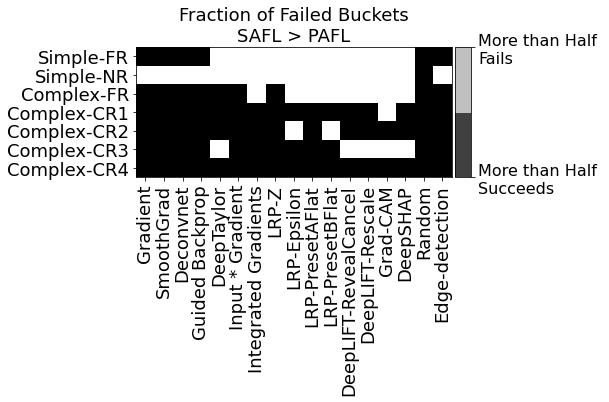

In [157]:
# Those that fail more than half the bucekt
exp_nos = [1.11, 2.11, 1.2, 3.71, 3.72, 3.73, 3.74]
exp_names = ['Simple-FR', 'Simple-NR', 'Complex-FR', 'Complex-CR1', 'Complex-CR2', 'Complex-CR3', 'Complex-CR4']
out = np.zeros((len(exp_nos), len(method_names), 2))
valid_bucket_ids = dict()
for i, exp_no in enumerate(exp_nos):
    valid_bucket_ids[exp_no] = dict()
    for m in range(len(method_names)):
        valid_bucket_ids[exp_no][m] = []
        #result, methods = load_saliency_results(exp_no)
        bucket_results = sorted(glob.glob("../outputs/cache/metrics_avg-weighted_%0.2f_*.npy"%(exp_no)))
        ids = sorted([int(x.split('_')[-1][:-4]) for x in bucket_results])
        no_buckets = 0
        count = 0
        for j in ids:
            d = np.load("../outputs/cache/metrics_avg-weighted_%0.2f_%d.npy"%(exp_no, j))
            dd = np.load("../outputs/cache/metrics_weighted_%0.2f_%d.npy"%(exp_no, j))
            P = dd[0][m]
            S = dd[2][m]
            B = 1 - P - S
            valid = (not np.isnan(P)) and (not np.isnan(S))
            if valid:
                valid_bucket_ids[exp_no][m].append(j)
                no_buckets +=1
                
                if S >= P : # secondary is higher than primary
                    count += 1
        out[i, m] = [count, no_buckets]

fail_rate_afl = out[:,:,0] / out[:,:,1]
fail_rate_afl[:,15] = 1
f, axs = plt.subplots(1,1, figsize=(6,5))
im = axs.imshow(1-fail_rate_afl > 0.5, cmap=plt.get_cmap('gray'))
axs.set(yticks=range(len(exp_names)), yticklabels=exp_names)
axs.set_yticklabels(exp_names, fontsize=18)
axs.set(xticks=range(len(method_names)), xticklabels=method_names)
axs.set_xticklabels(method_names, rotation=90, fontsize=18)

divider = make_axes_locatable(axs)
cax = divider.append_axes("right", size="5%", pad=0.05)
bounds = [0,0.5,1]
cbar = f.colorbar(im, cax=cax, ticks=[0,1], boundaries=[0,0.5,1])
cax.set_yticklabels(['More than Half\nSucceeds', 'More than Half \nFails'], fontsize=16)  # horizontal colorbar
axs.set_title('Fraction of Failed Buckets\nSAFL > PAFL', fontsize=18)